In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn


[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_json("data/SubtaskA/SubtaskA_train_monolingual_with_pronouns_features.jsonl", lines=True)

,text,label,source,id,pronouns,named_entities,ratio
model,,,,,,,
chatGPT,14339,14339,14339,14339,14339,14339,14338
cohere,13678,13678,13678,13678,13678,13678,13511
davinci,14343,14343,14343,14343,14343,14343,14249
dolly,14046,14046,14046,14046,14046,14046,14000
human,63351,63351,63351,63351,63351,63351,63196


In [5]:
df["ratio"] = df["pronouns"] / df["named_entities"]
df["ratio"].replace([np.inf, -np.inf], 0, inplace=True)
average_ratio = df.groupby("model")["ratio"].mean()
average_ratio

model
chatGPT     6.408503
cohere      3.550844
davinci     5.409835
dolly       4.381090
human      11.992610
Name: ratio, dtype: float64

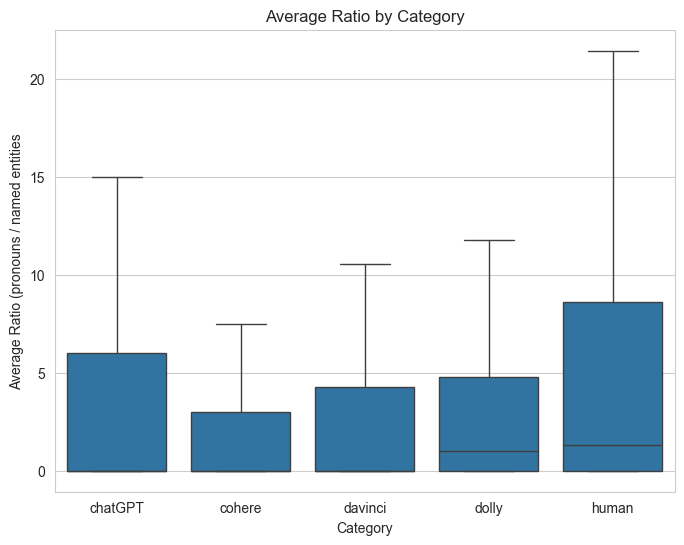

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='model', y='ratio', data=df, showfliers=False)
plt.xlabel('Category')
plt.ylabel('Average Ratio (pronouns / named entities')
plt.title('Average Ratio by Category')
plt.show()


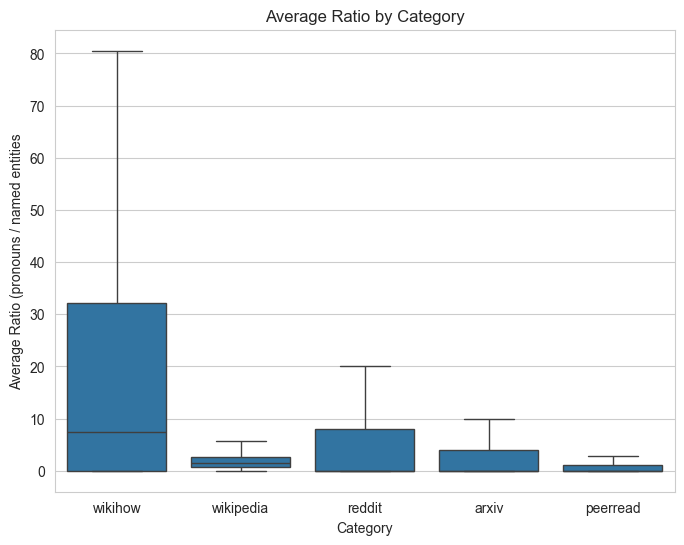

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='source', y='ratio', data=df, showfliers=False)
plt.xlabel('Category')
plt.ylabel('Average Ratio (pronouns / named entities')
plt.title('Average Ratio by Category')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# X = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df.get(["pronouns", "named_entities"])
Y = df["label"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
svm_model = SVC(kernel='linear', C=1.0)  # You can customize the kernel and other parameters

In [8]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.6052939211756847
Classification Report:
               precision    recall  f1-score   support

       False       0.56      0.85      0.67     11456
        True       0.74      0.38      0.50     12496

    accuracy                           0.61     23952
   macro avg       0.65      0.62      0.59     23952
weighted avg       0.65      0.61      0.58     23952
